In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import math as math
from  PIL import Image
from tqdm.notebook import tqdm
import types

In [2]:
imf_page = Image.open('pictures/book1.bmp')

In [3]:
arr_page = np.array(imf_page )
arr_page

array([[139, 139, 139, ..., 255, 255, 255],
       [138, 139, 139, ..., 255, 255, 255],
       [138, 139, 139, ..., 255, 255, 255],
       ...,
       [125, 125, 125, ..., 241, 241, 241],
       [125, 125, 125, ..., 241, 241, 241],
       [125, 125, 125, ..., 241, 241, 241]], dtype=uint8)

In [4]:
arr_page.shape

(3300, 2550)

In [55]:
class MyImage:
    def __init__(self, array):
        self.array = array.copy()
        self.noise = np.zeros(array.shape, dtype=bool)
        self.noise_removed = array.copy()

    def imshow(self):
        dim = self.array.shape

        fig = plt.figure(frameon=False)
        fig.set_size_inches(8,8*dim[0]/dim[1])
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        
        ax.set_axis_off()
        fig.add_axes(ax)
        ax.imshow( self.array, aspect='auto', cmap='gray')

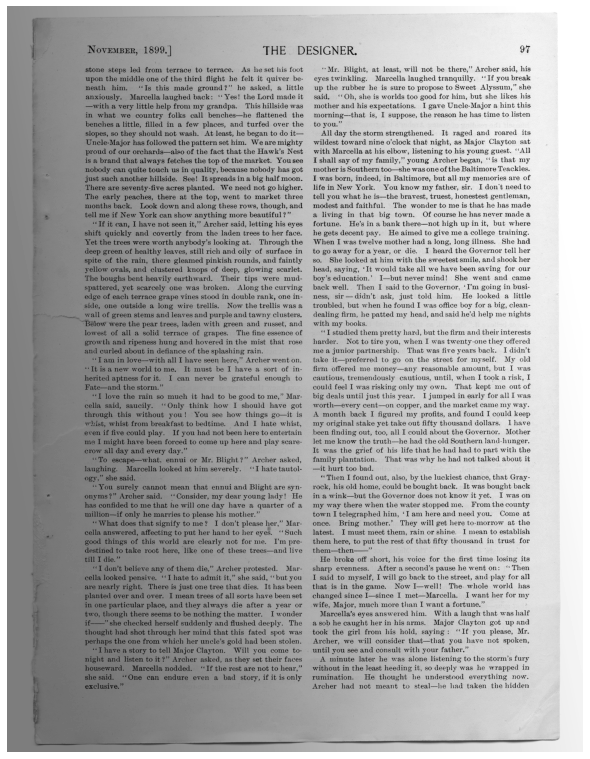

In [57]:
myi_page = MyImage(arr_page)
myi_page.imshow()

In [69]:
#MAX_VALUE = 255
class MyWindow(MyImage):
    def __init__(self, ar_im, center, window_size=20):
        #Parámetros de la función
        y_center, x_center  = center

        # Dimensiones del arreglo por separado.
        y_length, x_length = ar_im.shape
        y_length, x_length

        # Tamaño de la ventana, redondeado hacia abajo.
        half_window_size = math.floor(window_size/2)

        # Puntos de inicio y final de la ventana, tomando en consideración los bordes de la matriz.
        # Y #
        if y_center - half_window_size < 0:
            y_start = 0
            y_win_center = 0
        else:
            y_start = y_center - half_window_size
            y_win_center = half_window_size + 1

        if y_center + half_window_size > y_length:
            y_final = y_length
        else:
            y_final = y_center + half_window_size

        #X#
        if x_center - half_window_size < 0:
            x_start = 0
            x_win_center = 0
        else:
            x_start = x_center - half_window_size
            x_win_center = half_window_size + 1

        if x_center + half_window_size > x_length:
            x_final = x_length
        else:
            x_final = x_center + half_window_size
        
        self.intervals = slice(y_start,y_final), slice(x_start,x_final) 
        super().__init__(ar_im[self.intervals])
        self.center = center        
        self._win_center = y_win_center,x_win_center
        self.center_value = ar_im[center]

#Método window de la clase MyImage,       
def myimage_mywindow(self, center, window_size): 
    return MyWindow(self.array, center, window_size)

MyImage.window = myimage_mywindow

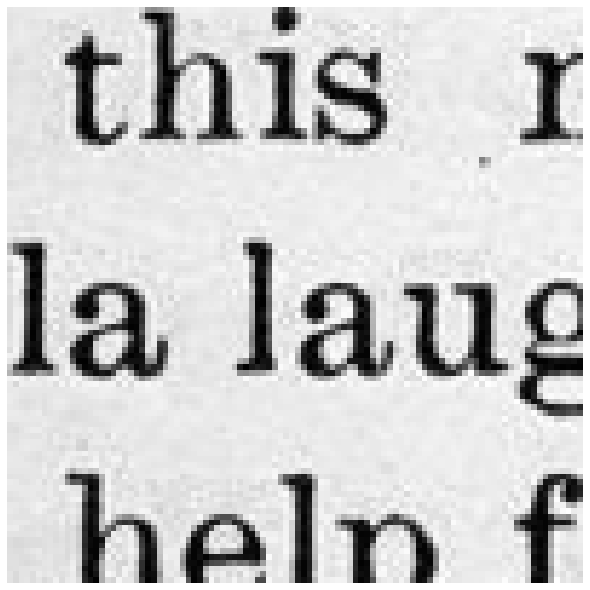

In [61]:
win_page = myi_page.window(center=(400,700), window_size=100)
win_page.imshow()

In [100]:

def mean_blur(arr_picture, win_size_out = 11, win_size_int = 7):
    arr_res = array.copy()
    win_semisize_int = math.floor(win_size_int/2)

    with tqdm(total=arr_picture.size) as pbar:
        for j in range(win_semisize_int, arr_picture.shape[0], win_semisize_int):
            for i in range(win_semisize_int, arr_picture.shape[1], win_semisize_int):
                window_out = MyWindow(arr_picture, (j,i), win_size_out)
                window_in = MyWindow(arr_picture, (j,i), win_size_int)
                arr_res[window_in.intervals] = np.mean(window_out.array)
            pbar.update(arr_picture.shape[1]*win_semisize_int)
    
    return MyImage(arr_res)

def myimage_meanblur(self, win_size_out = 11, win_size_int = 7): 
    return mean_blur(self.array, win_size_out, win_size_int)

MyImage.mean_blur = myimage_meanblur

  0%|          | 0/8415000 [00:00<?, ?it/s]

  0%|          | 0/8415000 [00:00<?, ?it/s]

  0%|          | 0/8415000 [00:00<?, ?it/s]

  0%|          | 0/8415000 [00:00<?, ?it/s]

  0%|          | 0/8415000 [00:00<?, ?it/s]

  0%|          | 0/8415000 [00:00<?, ?it/s]

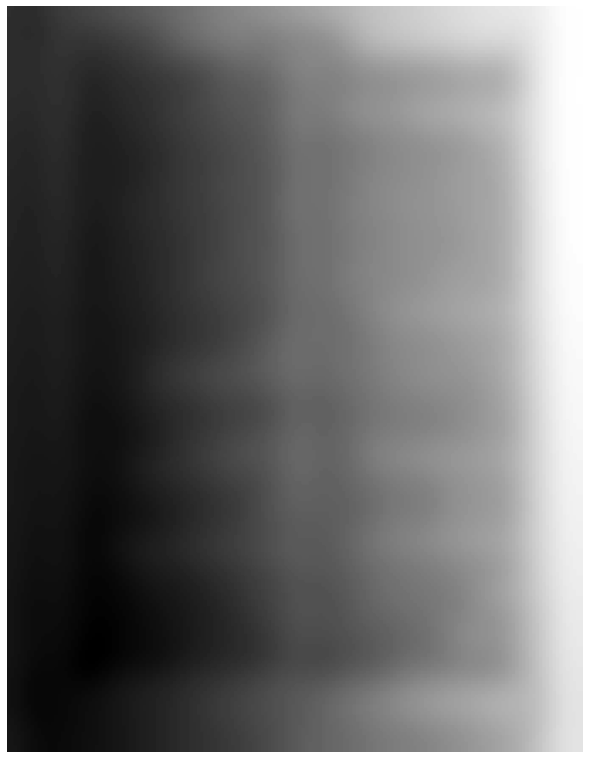

In [111]:
myi_bluered = myi_page.mean_blur(win_size_out = 101, win_size_int = 31)

for _ in range(5):
    myi_bluered = myi_bluered.mean_blur(win_size_out = 101, win_size_int = 31)

myi_bluered.imshow()

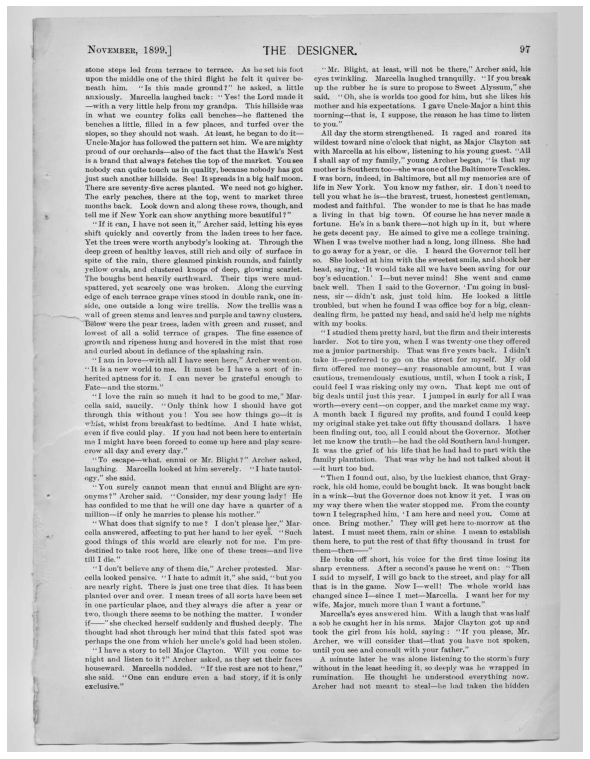

In [151]:
arr_divided = myi_page.array/myi_bluered.array

C = 255/(np.max(arr_divided)-np.min(arr_divided))
arr_divided =  np.round(arr_divided*C).astype(np.uint8)

MyImage(arr_divided).imshow()

In [152]:
arr_divided

array([[210, 210, 210, ..., 204, 204, 204],
       [208, 210, 210, ..., 204, 204, 204],
       [208, 210, 210, ..., 204, 204, 204],
       ...,
       [212, 212, 212, ..., 206, 206, 206],
       [212, 212, 212, ..., 206, 206, 206],
       [212, 212, 212, ..., 206, 206, 206]], dtype=uint8)

In [128]:

def cut_white(arr_picture):
    arr_res = array.copy()

    with tqdm(total=arr_picture.size) as pbar:
        for j in range(0, arr_picture.shape[0],):
            for i in range(0, arr_picture.shape[1]):
                if arr_picture[j,i] >= 40:
                    arr_res[j,i] = 250
            pbar.update(arr_picture.shape[1])  
    return MyImage(arr_res)

def myimage_cut_white(self): 
    return cut_white(self.array)

MyImage.cut_white = myimage_cut_white

  0%|          | 0/8415000 [00:00<?, ?it/s]

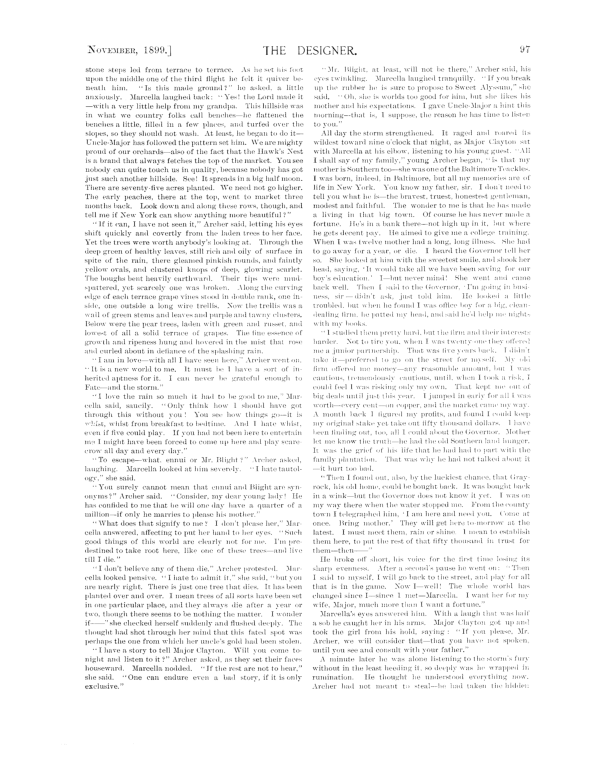

In [129]:
myi_page.cut_white().imshow()

(array([  22336.,   73602.,   56675.,   60788.,   41133.,   32106.,
          27387.,   24422.,   22910.,   22491.,   25611.,   20959.,
          20792.,   20816.,   22723.,   21578.,   20265.,   19856.,
          19098.,   19052.,   22342.,   18846.,   18624.,   18706.,
          18594.,   18546.,   18803.,   19183.,   19437.,   20006.,
          24500.,   21549.,   23276.,   25758.,   29895.,   39834.,
          65840.,  125385.,  228498.,  495710., 1176642.,  740679.,
         804338., 1101142., 1255227.,  905900.,  402317.,  124636.,
          33777.,    2410.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer obje

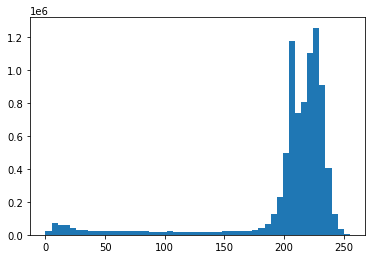

In [141]:
myi_divided.array = np.round(myi_divided.array/(np.max(myi_divided.array)-np.min(myi_divided.array))*255)
plt.hist(myi_divided.array.flatten(),bins=50)
